In [1]:
from torchvision import datasets, transforms

In [78]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F

import numpy as np

# Data

In [3]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
        batch_size=20, shuffle=True)


test_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root='../data', train=False, download=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                       ])),
    batch_size=1, shuffle=True)


In [28]:
def sample_gumbel(n,k):
    unif = torch.distributions.Uniform(0,1).sample((n,k))
    g = -torch.log(-torch.log(unif))
    return g

In [151]:
def sample_gumbel_softmax(pi, n, temperature):
    k = len(pi)
    g = sample_gumbel(n, k)
    h = (g + torch.log(pi))/temperature
    h_max = h.max(dim=1, keepdim=True)[0]
    h = h - h_max
    cache = torch.exp(h)
#     print(pi, torch.log(pi), intmdt)
    y = cache / cache.sum(dim=-1, keepdim=True)
    return y

In [152]:
import matplotlib.pyplot as plt

# Probability Distribution

(0, 1)

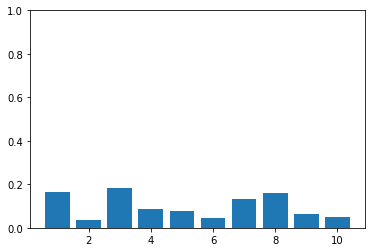

In [153]:
k = 10
n = 1
pi = torch.rand(k, dtype=torch.float)
pi = pi/pi.sum()
plt.bar(np.arange(k)+1, pi.numpy())
plt.ylim(0,1)

# Samples

## Gumbel-softmax

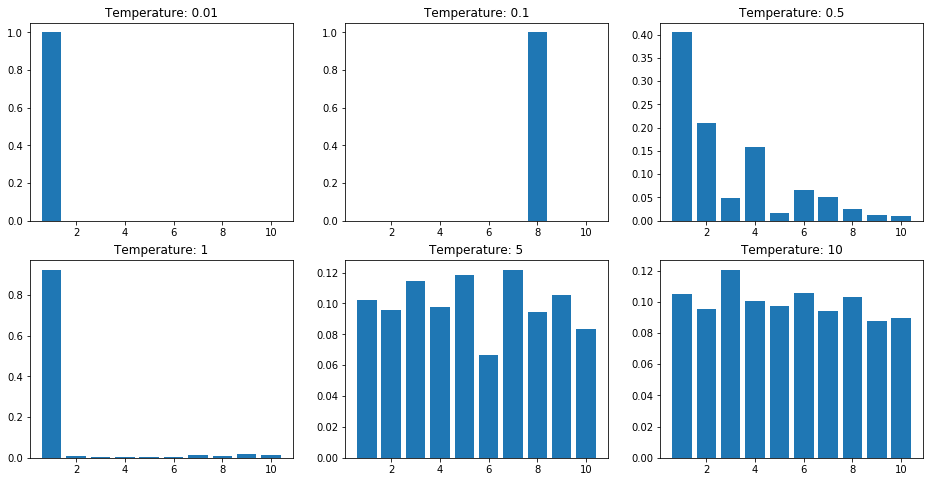

In [154]:
tau_vals = [0.01, 0.1, 0.5, 1, 5, 10]
plt.figure(figsize=(16,8))
for i in range(1, 7):
    plt.subplot(230+i)
    z = sample_gumbel_softmax(pi=pi, n=n, temperature=tau_vals[i-1])
    plt.bar(np.arange(k)+1, z.flatten().numpy())
    plt.title('Temperature: {}'.format(tau_vals[i-1]))
# plt.ylim(0,1)

# Categorical

(array([0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 9 Patch objects>)

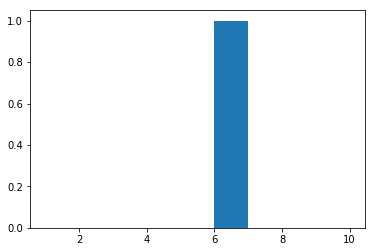

In [146]:
z = torch.distributions.Categorical(probs=pi).sample((n,)).float()
plt.hist(z.numpy(), bins=np.arange(k)+1)
# plt.ylim(0,1)